Matplotlib Plotting 

Edward tufte's

Graphical integrity Principles:

1.Representations of numbers should match thier true proportions
2.Labling should be clear, detailed, and thorough
3.Designs should show only data variations not design variation
4.standarized units are best when representing money 
5.
6.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
titanic_df["embarked_new"]=np.where(titanic_df["Embarked"]=="C","Cherbourg",
                                    np.where(titanic_df["Embarked"]=="Q","Queensland",
                                            "Southampton"))

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None


In [18]:
titanic_df["mr_mrs"]=np.where(titanic_df["Name"].str.contains("Mrs."), "Mrs.",
                              np.where(titanic_df["Name"].str.contains("Mrs."),"Mrs."))

ValueError: either both or neither of x and y should be given

In [16]:
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
titanic_df["mr_mrs"].value_counts()

KeyError: 'mr_mrs'

Basic Plots

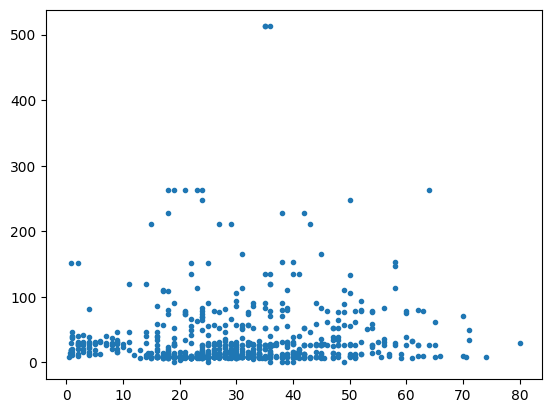

In [19]:
#age is x-axis
plt.plot(titanic_df["Age"],titanic_df["Fare"],'.')

histograms

Text(0.5, 1.0, 'Histogram of Titanic Ports of Embarkation')

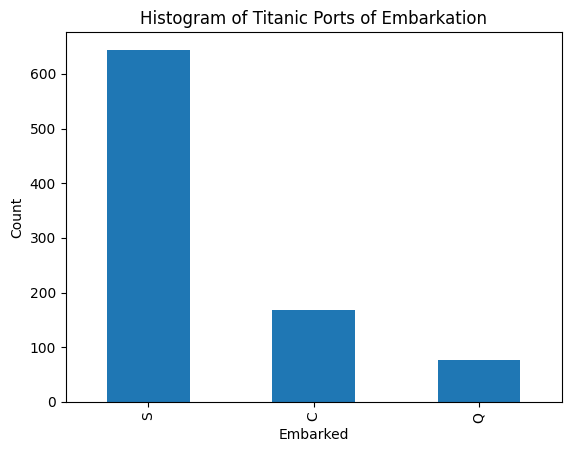

In [29]:
#pandas plot
embarked_count=titanic_df["Embarked"].value_counts()
embarked_count.plot(kind="bar")
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Histogram of Titanic Ports of Embarkation')

pie chart

In [21]:
agg_gender = titanic_df.groupby("Sex").count()
agg_gender

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new
Sex,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314
male,577,577,577,577,453,577,577,577,577,107,577,577


<Axes: ylabel='PassengerId'>

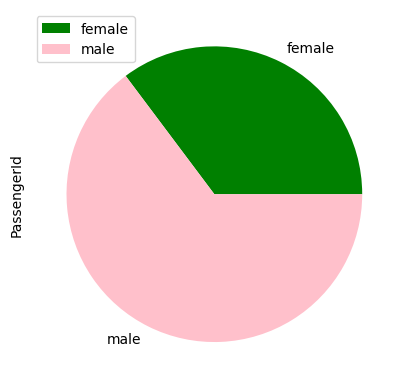

In [27]:
colors = ['green', 'pink']
agg_gender.plot(kind="pie", y = "PassengerId", colors=colors)